### Project Objectives and questions to answer

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
7. 3 o'clock pulse 
8. percent change graphic 

 
- This project intends to extract and load 1 year of data on three etf's... 
   - Nasdaq (QQQ)
   - SPider (SPY) 
   - Dow Industrial (DIA)
   
The goal is to find and use "important" technical features to and ultiately, predict the prices of the three stock above. 

In [53]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
import math


In [54]:
#!pip install  pandas_datareader 
#from pandas_datareader._utils import RemoteDataError


In [55]:
import pandas_datareader as dr
from pandas_datareader._utils import RemoteDataError
from pandas_datareader import data
from datetime import datetime

## Defining variables for future use in some helpful functions. (I may want to use this  code later to create a dashboard for any ticker)

In [56]:
Start = '2019 -01-01'
End = str(datetime.now().strftime('%Y-%m-%d'))

In [57]:
Invesco = 'QQQ'
Dow = 'DIA'
Spyder = 'SPY' 

In [58]:
# creating a function that will gather data on each stock called get_data

def get_data(ticker):
    try:
        stock_data = data.DataReader(ticker,'yahoo',Start, End)
        print(stock_data)
        
    except RemoteDataError:
        print(" No data found for {t}".format(t=ticker))
         

In [59]:
def get_stats(stock_data):
    return {
        'last': np.mean(stock_data.tail(1))
    }

In [60]:
def clean(stock_data,col):
    wkdays = pd.date_range_(start = Start, end=End)
    clean_data = stock_data[col].reindex(wkdays)
    return clean_data.ffilna(method = 'ffill')

In [61]:
get_data(Dow)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-01-02  234.000000  229.139999  229.270004  233.360001  5319500.0   
2019-01-03  231.419998  226.360001  231.250000  226.720001  7350200.0   
2019-01-04  235.179993  229.729996  230.000000  234.279999  7343700.0   
2019-01-07  236.880005  232.949997  234.839996  235.360001  5101600.0   
2019-01-08  238.660004  235.789993  237.940002  237.919998  4845800.0   
...                ...         ...         ...         ...        ...   
2021-03-08  321.730011  315.829987  316.750000  318.250000  8225000.0   
2021-03-09  321.769989  318.440002  319.470001  318.609985  5812200.0   
2021-03-10  324.309998  320.470001  320.529999  323.329987  6436900.0   
2021-03-11  326.970001  323.829987  324.709991  325.329987  5734600.0   
2021-03-12  326.809998  325.579987  324.709991  326.570007   624600.0   

             Adj Close  
Date                    


In [62]:
get_data(Dow)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-01-02  234.000000  229.139999  229.270004  233.360001  5319500.0   
2019-01-03  231.419998  226.360001  231.250000  226.720001  7350200.0   
2019-01-04  235.179993  229.729996  230.000000  234.279999  7343700.0   
2019-01-07  236.880005  232.949997  234.839996  235.360001  5101600.0   
2019-01-08  238.660004  235.789993  237.940002  237.919998  4845800.0   
...                ...         ...         ...         ...        ...   
2021-03-08  321.730011  315.829987  316.750000  318.250000  8225000.0   
2021-03-09  321.769989  318.440002  319.470001  318.609985  5812200.0   
2021-03-10  324.309998  320.470001  320.529999  323.329987  6436900.0   
2021-03-11  326.970001  323.829987  324.709991  325.329987  5734600.0   
2021-03-12  326.809998  325.579987  324.709991  326.570007   624600.0   

             Adj Close  
Date                    


In [63]:
get_data(Invesco)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  155.750000  150.880005  150.990005  154.880005  58576700.0   
2019-01-03  153.259995  149.490005  152.600006  149.820007  74820200.0   
2019-01-04  157.000000  151.740005  152.339996  156.229996  74709300.0   
2019-01-07  158.860001  156.110001  156.619995  158.089996  52059300.0   
2019-01-08  160.110001  157.199997  159.539993  159.520004  49388700.0   
...                ...         ...         ...         ...         ...   
2021-03-08  310.059998  299.510010  308.119995  299.940002  88174300.0   
2021-03-09  313.730011  306.920013  307.470001  311.769989  80107600.0   
2021-03-10  316.470001  310.170013  316.160004  310.880005  76547300.0   
2021-03-11  319.859985  314.850006  315.769989  318.040009  53244500.0   
2021-03-12  314.320007  312.109985  313.859985  314.260010  10367891.0   

             Adj Close  
Date        

In [64]:
get_data(Spyder)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2019-01-02  251.210007  245.949997  245.979996  250.179993  126925200.0   
2019-01-03  248.570007  243.669998  248.229996  244.210007  144140700.0   
2019-01-04  253.110001  247.169998  247.589996  252.389999  142628800.0   
2019-01-07  255.949997  251.690002  252.690002  254.380005  103139100.0   
2019-01-08  257.309998  254.000000  256.820007  256.769989  102512600.0   
...                ...         ...         ...         ...          ...   
2021-03-08  387.679993  381.420013  384.660004  381.720001  122957100.0   
2021-03-09  389.910004  385.309998  385.850006  387.170013  113457800.0   
2021-03-10  391.399994  388.170013  389.690002  389.579987  109660800.0   
2021-03-11  395.649994  391.739990  392.230011  393.529999   86027400.0   
2021-03-12  392.701111  391.279999  392.230011  392.660004    9696376.0   

             Adj Close  

#### An alternate method of gathering data for more than one ticker at a time. 

## Importing stock prices from Yahoo Finance. 

In [65]:
#!pip install yfinance
import yfinance as yf 

In [66]:
ticker = "QQQ"

In [67]:
Nasdaq = yf.download(ticker, start = "2020-1-1", end = "2021-2-19")

[*********************100%***********************]  1 of 1 completed


In [68]:
type(Nasdaq)

pandas.core.frame.DataFrame

In [69]:
# getting data for more than one stock(or etf)

ticks = ['QQQ','SPY','DIA']

In [70]:
etfs = yf.download(ticks, start = "2020-1-1", end = "2021-2-20", rounding = True, group_by = "ticker")
etfs

[*********************100%***********************]  3 of 3 completed


DIA                                                QQQ          \
              Open    High     Low   Close Adj Close   Volume    Open    High   
Date                                                                            
2020-01-02  286.44  288.63  286.15  288.62    281.82  3865500  214.40  216.16   
2020-01-03  285.34  287.11  285.18  286.32    279.58  3296700  213.30  215.47   
2020-01-06  284.29  287.03  284.16  286.98    280.22  1645100  212.50  215.59   
2020-01-07  286.30  286.79  285.58  285.74    279.01  1413000  215.64  216.14   
2020-01-08  285.32  288.67  285.08  287.40    280.63  3136700  215.50  218.14   
...            ...     ...     ...     ...       ...      ...     ...     ...   
2021-02-12  314.28  315.14  313.83  315.04    314.44  2478800  333.71  336.62   
2021-02-16  316.33  316.54  314.87  315.58    314.98  1836300  337.27  338.19   
2021-02-17  314.69  316.91  313.87  316.60    316.00  2007400  332.47  335.66   
2021-02-18  314.75  316.00  313.38  315.56    314.96  2609600  330.23  333.87   
2021-02-19  315.61  316.34  314.58  314.92    314.92  2314900  333.86  333.99   

                                                   SPY                  \
               Low   Close Adj Close    Volume    Open    High     Low   
Date                                                                     
2020-01-02  213.98  216.16    214.94  30969400  323.54  324.89  322.53   
2020-01-03  213.28  214.18    212.97  27518900  321.16  323.64  321.10   
2020-01-06  212.24  215.56    214.34  21655300  320.49  323.73  320.36   
2020-01-07  214.85  215.53    214.31  22139300  323.02  323.54  322.24   
2020-01-08  215.16  217.15    215.92  26397300  322.94  325.78  322.67   
...            ...     ...       ...       ...     ...     ...     ...   
2021-02-12  332.63  336.45    336.45  20318000  389.85  392.90  389.77   
2021-02-16  334.34  335.54    335.54  27080800  393.96  394.17  391.53   
2021-02-17  330.17  333.93    333.93  31360300  390.42  392.66  389.33   
2021-02-18  328.36  332.47    332.47  32236200  389.59  391.52  387.74   
2021-02-19  329.97  331.02    331.02  39157700  392.07  392.38  389.55   

                                        
             Close Adj Close    Volume  
Date                                    
2020-01-02  324.87    318.91  59151200  
2020-01-03  322.41    316.50  77709700  
2020-01-06  323.64    317.71  55653900  
2020-01-07  322.73    316.81  40496400  
2020-01-08  324.45    318.50  68296000  
...            ...       ...       ...  
2021-02-12  392.64    392.64  50505700  
2021-02-16  392.30    392.30  50972400  
2021-02-17  392.39    392.39  52290600  
2021-02-18  390.72    390.72  59712800  
2021-02-19  390.03    390.03  83241000  

[286 rows x 18 columns]

In [71]:
etfs_close = yf.download(ticks, start = "2019-1-1", end = "2021-2-20", rounding = True)["Close"]
etfs_close

[*********************100%***********************]  3 of 3 completed


,DIA,QQQ,SPY
Date,,,
2019-01-02,233.36,154.88,250.18
2019-01-03,226.72,149.82,244.21
2019-01-04,234.28,156.23,252.39
2019-01-07,235.36,158.09,254.38
2019-01-08,237.92,159.52,256.77
...,...,...,...
2021-02-12,315.04,336.45,392.64
2021-02-16,315.58,335.54,392.30
2021-02-17,316.60,333.93,392.39


In [72]:
etfs_close.head()

,DIA,QQQ,SPY
Date,,,
2019-01-02,233.36,154.88,250.18
2019-01-03,226.72,149.82,244.21
2019-01-04,234.28,156.23,252.39
2019-01-07,235.36,158.09,254.38
2019-01-08,237.92,159.52,256.77


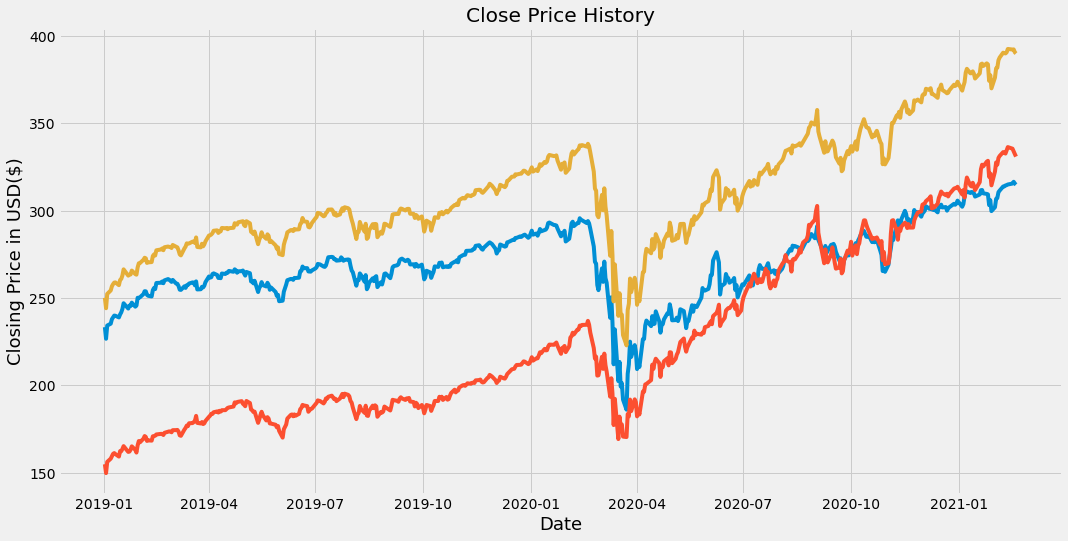

In [73]:
# Visualize the closing price history 
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(etfs_close)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in USD($)', fontsize = 18)

plt.show()

In [74]:
etfs_close['DOW_Chnge']= etfs_close.DIA - etfs_close.DIA.shift(1)
etfs_close['NASDQ_Chnge']= etfs_close.QQQ - etfs_close.QQQ.shift(1)
etfs_close['SPYDR_Chnge']= etfs_close.SPY - etfs_close.SPY.shift(1)
# adding in columns for daily change in closing etf prices

In [75]:
etfs_close['QQQ_per_chnge'] = etfs_close['NASDQ_Chnge'].pct_change().round(4)
etfs_close['DIA_per_chnge'] = etfs_close['DOW_Chnge'].pct_change().round(4)
etfs_close['SPY_per_chnge'] = etfs_close['SPYDR_Chnge'].pct_change().round(4)
# adding in cloumns for percent change

In [76]:
etfs_close.head(4)

,DIA,QQQ,SPY,DOW_Chnge,NASDQ_Chnge,SPYDR_Chnge,QQQ_per_chnge,DIA_per_chnge,SPY_per_chnge
Date,,,,,,,,,
2019-01-02,233.36,154.88,250.18,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,226.72,149.82,244.21,-6.64,-5.06,-5.97,NaN,NaN,NaN
2019-01-04,234.28,156.23,252.39,7.56,6.41,8.18,-2.2668,-2.1386,-2.3702
2019-01-07,235.36,158.09,254.38,1.08,1.86,1.99,-0.7098,-0.8571,-0.7567


In [77]:
type(etfs_close)

pandas.core.frame.DataFrame

In [78]:
etfs_close['QQQ_per_chnge']

Date
2019-01-02       NaN
2019-01-03       NaN
2019-01-04   -2.2668
2019-01-07   -0.7098
2019-01-08   -0.2312
               ...  
2021-02-12    0.0219
2021-02-16   -1.4866
2021-02-17    0.7692
2021-02-18   -0.0932
2021-02-19   -0.0068
Name: QQQ_per_chnge, Length: 538, dtype: float64

In [79]:
etfs_close['DIA_per_chnge'] 


Date
2019-01-02       NaN
2019-01-03       NaN
2019-01-04   -2.1386
2019-01-07   -0.8571
2019-01-08    1.3704
               ...  
2021-02-12    1.0000
2021-02-16    0.5000
2021-02-17    0.8889
2021-02-18   -2.0196
2021-02-19   -0.3846
Name: DIA_per_chnge, Length: 538, dtype: float64

In [80]:
etfs_close['SPY_per_chnge'] 

Date
2019-01-02        NaN
2019-01-03        NaN
2019-01-04    -2.3702
2019-01-07    -0.7567
2019-01-08     0.2010
               ...   
2021-02-12     2.0635
2021-02-16    -1.1762
2021-02-17    -1.2647
2021-02-18   -19.5556
2021-02-19    -0.5868
Name: SPY_per_chnge, Length: 538, dtype: float64

In [81]:
etfs_chnge = etfs_close.loc[:,['QQQ_per_chnge','DIA_per_chnge','SPY_per_chnge']].dropna(how = 'all')
etfs_chnge.head(2)

,QQQ_per_chnge,DIA_per_chnge,SPY_per_chnge
Date,,,
2019-01-04,-2.2668,-2.1386,-2.3702
2019-01-07,-0.7098,-0.8571,-0.7567


In [82]:
#Creating functions to caluclate the 20 and 50 day Simple Moving Averages and Exponential moving Average

def SMA(data, periods = 20, columns = 'Close'):
    return data[column].rolling(window=period).mean()

In [83]:
# Visualize the closing price history 
#plt.figure(figsize = (16,8))
#plt.title("Close Price History")
#plt.plot(etfs_chnge)
#plt.xlabel('Date', fontsize = 18)
#plt.ylabel('Closing Price in USD($)', fontsize = 18)

#plt.show()

In [84]:
# Convert the dataframe into a numpy 

data = etfs_close.values

In [85]:
# get the number of rows to train our model with
train_data_len = math.ceil(len(data)* 0.8)
train_data_len

431

In [86]:
!pip install keras
!pip install tensorflow
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM 

In [87]:
# Scaling the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

ValueError: Input contains infinity or a value too large for dtype('float64').

In [88]:
# Creating a scaled training dataset 
data_train = scaled_data[0:train_data_len, :]  

NameError: name 'scaled_data' is not defined

In [ ]:
# Splitting the data into X_train and y_train data sets 
X_train =[]
y_train = []

In [ ]:
# creating a loop to append for previous 60 days of data
for i in range(60,len(data_train)):
        X_train.append(data_train[i-60:i,0])
        y_train.append(data_train[i,0])
        if i <= 61:
            print(X_train)
            print(y_train)
            print()
               

In [ ]:
# converting the X_train andy_train into numpy arrays
X_train, y_train = np.array(X_train),np.array(y_train)

In [ ]:
# Reshaping the data in preparation for use in the LSTM model which accepts 
# 3D data 

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1 ],1))
X_train.shape

In [ ]:
# Build the LSTM model(LSTM stands for "Long Short Term Memory" and is a type of neural network)
from keras.models import Sequential

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# compile the model 

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
# train the model
model.fit(X_train,y_train, batch_size =1, epochs=1)

In [ ]:
#Create the testing data... a new array of scaled values 

test = scaled_data[train_data_len - 60: , :]

In [ ]:
# create the data sets X_test and y_test
X_test = []
y_test = data[train_data_len:, :]

for i in range(60, len(test)):
    X_test.append(test[i-60:i, 0])

In [ ]:
# converting the dataset into a numpy array
X_test = np.array(X_test)

In [ ]:
#reshaping the test dataset
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
# get the predicted price values
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

In [ ]:
#getting RMSE
rmse = np.sqrt(np.mean(preds- y_test)**2)
rmse

## Third version with a slight modification of the 2nd... Only pulling info on QQQ to be sure things work.


In [89]:
df = dr.DataReader('QQQ', data_source= 'yahoo', start = '2019-01-01',end= '2021-02-20')
df=df.round(2)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,155.75,150.88,150.99,154.88,58576700.0,152.74
2019-01-03,153.26,149.49,152.60,149.82,74820200.0,147.75
2019-01-04,157.00,151.74,152.34,156.23,74709300.0,154.08
2019-01-07,158.86,156.11,156.62,158.09,52059300.0,155.91
2019-01-08,160.11,157.20,159.54,159.52,49388700.0,157.32
...,...,...,...,...,...,...
2021-02-12,336.62,332.63,333.71,336.45,20318000.0,336.45
2021-02-16,338.19,334.34,337.27,335.54,27080800.0,335.54
2021-02-17,335.66,330.17,332.47,333.93,31360300.0,333.93


In [90]:
window = 1 
col_pct_chng = "pct_chng" + "_" +str(window)
df['col_pct_chng'] = df.Close.pct_change(window)*100
df['col_pct_chng'].round(4)

Date
2019-01-02       NaN
2019-01-03   -3.2670
2019-01-04    4.2785
2019-01-07    1.1906
2019-01-08    0.9045
               ...  
2021-02-12    0.5589
2021-02-16   -0.2705
2021-02-17   -0.4798
2021-02-18   -0.4372
2021-02-19   -0.4361
Name: col_pct_chng, Length: 538, dtype: float64

In [91]:
df.head()


,High,Low,Open,Close,Volume,Adj Close,col_pct_chng
Date,,,,,,,
2019-01-02,155.75,150.88,150.99,154.88,58576700.0,152.74,NaN
2019-01-03,153.26,149.49,152.60,149.82,74820200.0,147.75,-3.267045
2019-01-04,157.00,151.74,152.34,156.23,74709300.0,154.08,4.278467
2019-01-07,158.86,156.11,156.62,158.09,52059300.0,155.91,1.190552
2019-01-08,160.11,157.20,159.54,159.52,49388700.0,157.32,0.904548


In [92]:
df['Closing_Chnge'] = df.Close - df.Close.shift(1)

In [93]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,col_pct_chng,Closing_Chnge
Date,,,,,,,,
2019-01-02,155.75,150.88,150.99,154.88,58576700.0,152.74,NaN,NaN
2019-01-03,153.26,149.49,152.60,149.82,74820200.0,147.75,-3.267045,-5.06
2019-01-04,157.00,151.74,152.34,156.23,74709300.0,154.08,4.278467,6.41
2019-01-07,158.86,156.11,156.62,158.09,52059300.0,155.91,1.190552,1.86
2019-01-08,160.11,157.20,159.54,159.52,49388700.0,157.32,0.904548,1.43


C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   0.,   1.,   0.,   3.,   1.,   2.,   7.,  14.,  21.,  34.,
        109., 174., 111.,  31.,  12.,   8.,   3.,   3.,   2.]),
 array([-23.04 , -21.137, -19.234, -17.331, -15.428, -13.525, -11.622,
         -9.719,  -7.816,  -5.913,  -4.01 ,  -2.107,  -0.204,   1.699,
          3.602,   5.505,   7.408,   9.311,  11.214,  13.117,  15.02 ]),
 <BarContainer object of 20 artists>)

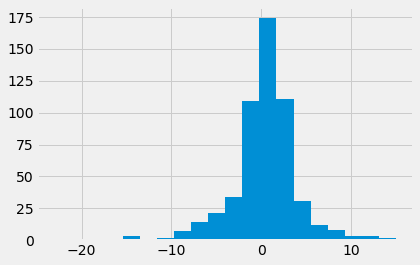

In [94]:
plt.hist(df['Closing_Chnge'], bins= 20)

### Using Beautiful Soup to scrape headlines from Finviz 

In [95]:
#from urlib.request import urlopen, Request
#! pip install bs4
from bs4 import BeautifulSoup

In [96]:
#!pip install requests
import requests
from urllib.request import urlopen, Request

In [97]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['QQQ','SPY','DIA']

In [98]:
news_tables = {} 

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url = url, headers = {'user-agent':'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = "news-table") 
    news_tables[ticker]= news_table
    break
    
print(news_tables)

{'QQQ': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Mar-12-21 09:34AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-news-live-updates-march-12-2021-231228213.html" target="_blank">Stock market news live updates: Stocks mixed after record-setting rally, tech stocks slide as Treasury yields climb</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>
<tr><td align="right" width="130">06:01AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-record-high-coronavirus-one-year-morning-brief-110109977.html" target="_blank">Record highs, one year later: Morning Brief</a></div><div clas

In [99]:
print(news_tables)

{'QQQ': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Mar-12-21 09:34AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-news-live-updates-march-12-2021-231228213.html" target="_blank">Stock market news live updates: Stocks mixed after record-setting rally, tech stocks slide as Treasury yields climb</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>
<tr><td align="right" width="130">06:01AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-record-high-coronavirus-one-year-morning-brief-110109977.html" target="_blank">Record highs, one year later: Morning Brief</a></div><div clas

### Starting scratch code to parse the text from the webpage

In [100]:
# testing code on QQQ

qqq_data = news_tables['QQQ']    
qqq_rows = qqq_data.find_all('tr')

In [101]:
qqq_rows

[<tr><td align="right" style="white-space:nowrap" width="130">Mar-12-21 09:34AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-news-live-updates-march-12-2021-231228213.html" target="_blank">Stock market news live updates: Stocks mixed after record-setting rally, tech stocks slide as Treasury yields climb</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>,
 <tr><td align="right" width="130">06:01AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-record-high-coronavirus-one-year-morning-brief-110109977.html" target="_blank">Record highs, one year later: Morning Brief</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>,
 <tr><

In [102]:
for index, row in enumerate(qqq_rows):
    title = row.a.text                # this looks for the anchor tag inside each table row and give the text
    timestamp = row.td.text           # pasring the timestamp using the td tag from the table 
    print(timestamp + " " + title)

Mar-12-21 09:34AM   Stock market news live updates: Stocks mixed after record-setting rally, tech stocks slide as Treasury yields climb
06:01AM   Record highs, one year later: Morning Brief
Mar-11-21 04:02PM   Stock market news live updates: Dow, S&P 500 set records, tech and Bitcoin soar as Biden stimulus signing feeds risk rally
05:57AM   'Inflation is a process'
Mar-10-21 11:03AM   Girls Who Code CEO on women in tech: We're not getting hired, or supported
06:03AM   Dip buyers were out in full force
Mar-09-21 05:55AM   New day, same story
Mar-08-21 10:26AM   A glossary of the Federal Reserve's full arsenal of 'bazookas'
05:55AM   Rising interest rates are a good sign for stocks
Mar-07-21 08:55AM   Roblox goes public, inflation data: What to know in the week ahead
Mar-05-21 01:08PM   $1.6 Trillion Gone: Nasdaq Stock Implosion Gets Ugly
12:40PM   Here's why tech is getting whacked while Buffett's Berkshire Hathaway and Chevron are surging: Trader
10:29AM   QQQ Option Trade Idea When Vo

In [103]:
# creating the parsed data for all tickers

parsed_data = []

for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        
        title = row.a.get_text()
        date_data = row.td.text.split(' ') # splitting the date based on length of timestamp to handle the different types of dates
    
        if len(date_data) == 1:
            time = date_data[0]
        else: 
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
    
print(parsed_data)

[['QQQ', 'Mar-12-21', '09:34AM\xa0\xa0', 'Stock market news live updates: Stocks mixed after record-setting rally, tech stocks slide as Treasury yields climb'], ['QQQ', 'Mar-12-21', '06:01AM\xa0\xa0', 'Record highs, one year later: Morning Brief'], ['QQQ', 'Mar-11-21', '04:02PM\xa0\xa0', 'Stock market news live updates: Dow, S&P 500 set records, tech and Bitcoin soar as Biden stimulus signing feeds risk rally'], ['QQQ', 'Mar-11-21', '05:57AM\xa0\xa0', "'Inflation is a process'"], ['QQQ', 'Mar-10-21', '11:03AM\xa0\xa0', "Girls Who Code CEO on women in tech: We're not getting hired, or supported"], ['QQQ', 'Mar-10-21', '06:03AM\xa0\xa0', 'Dip buyers were out in full force'], ['QQQ', 'Mar-09-21', '05:55AM\xa0\xa0', 'New day, same story'], ['QQQ', 'Mar-08-21', '10:26AM\xa0\xa0', "A glossary of the Federal Reserve's full arsenal of 'bazookas'"], ['QQQ', 'Mar-08-21', '05:55AM\xa0\xa0', 'Rising interest rates are a good sign for stocks'], ['QQQ', 'Mar-07-21', '08:55AM\xa0\xa0', 'Roblox goes p

### Using NLTK Vader to analyze sentiment

In [104]:
#!pip install nltk

In [105]:
import nltk 

In [106]:
#nltk.download()

In [107]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer 